In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.metrics import average_precision_score , roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Definindo uma função para medir a proporção e acertar POSITIVOS
def acertos_prop(p,y):
    y = pd.Series(y)
    k,j = 0,0
    pl = p
    for e in range(len(y)):
        if (pl[e] > 0.5 and y[e] == 0):
             k += 1
        
        elif (pl[e] > 0.5 and y[e] == 1):
            j += 1
    prop = (j/(j+k))
    return prop

In [3]:
# Importando os dados com o processo de Label Enconder já realizado
x_train = pd.read_csv('df_train.csv')
y_train = x_train['y'].values
x_train = x_train.drop(['y','Unnamed: 0'],axis=1)

x_test =  pd.read_csv('df_test.csv')
y_test = x_test['y'].values
x_test = x_test.drop(['y','Unnamed: 0'],axis=1)

In [4]:
x_train.shape[0],x_test.shape[0]

(65236, 114333)

In [123]:
# Realizando uma análise para determinar um parametro K "otimo" (que concilie uma boa proporção e bom valor para métrica)
props = []
avgs =  []
for e in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = e)
    knn.fit(x_train,y_train)
    
    p_kn = knn.predict_proba(x_test)[:,1]
    avg =  average_precision_score(y_test,p_kn)
    prop = acertos_prop(p_kn,y_test)
    
    props.append(prop)
    avgs.append(avg)

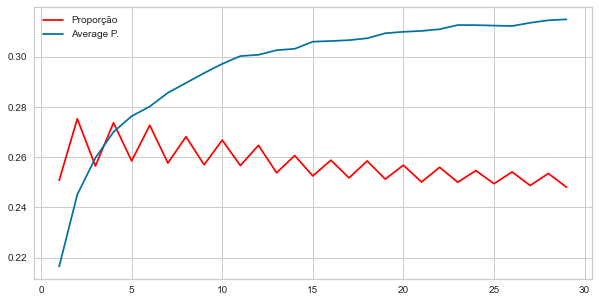

In [124]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),props,label='Proporção',color = 'red')
plt.plot(range(1,30),avgs,label='Average P.')
plt.legend()

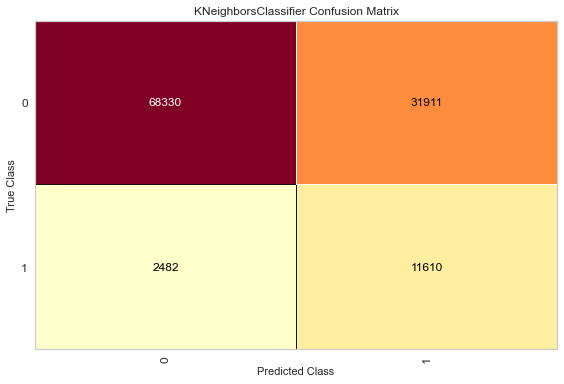

LGBMClassifier 
AVG: 0.29709632848199863 
ROC: 0.8149850387673285
0.2667677672847591


In [5]:
# Criando um novo modelo utilizando o valor de K "ótimo"
knn = ConfusionMatrix(KNeighborsClassifier(n_neighbors = 10))
knn = knn.fit(x_train,y_train)
knn.score(x_test, y_test)
knn.poof()

p_kn = knn.predict_proba(x_test)[:,1]
print(f'LGBMClassifier \nAVG: {average_precision_score(y_test,p_kn)} \nROC: {roc_auc_score(y_test,p_kn)}')
print(acertos_prop(p_kn,y_test))

In [6]:
predicts = knn.predict(x_test)

print('Optmized KNN') 
print(metrics.classification_report(y_test, predicts))

p_lg = knn.predict_proba(x_test)[:,1]
print(f'AUC: {roc_auc_score(y_test,p_lg)} \nAVG: {average_precision_score(y_test,p_lg)} ')

Optmized KNN
              precision    recall  f1-score   support

           0       0.96      0.68      0.80    100241
           1       0.27      0.82      0.40     14092

    accuracy                           0.70    114333
   macro avg       0.62      0.75      0.60    114333
weighted avg       0.88      0.70      0.75    114333

AUC: 0.8149850387673285 
AVG: 0.29709632848199863 
